In [177]:
#Import Libraries
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
import plotly.express as px
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

!pip install unidecode
import unidecode

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [178]:
def dfCleaning(df):
    
    from nltk.stem import WordNetLemmatizer 
    nltk.download('wordnet')
    from nltk.stem import PorterStemmer
    nltk.download('punkt')
    from nltk.tokenize import word_tokenize 
    import matplotlib.animation as animation
    import operator
    from collections import Counter
    
    #import pandas_profiling

    #df = df[['text','retweet_count','favorite_count']]
    df.drop_duplicates(inplace = True)
    #Code to remove https
    df['clean_tweet'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    #Code to remove @
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
    #Removing numbers
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))
    #Removing all the greek characters using unidecode library
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 
    #Removing the word 'hmm' and it's variants
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))
    #Code for removing slang words
    d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
                   'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
                   'cud':'could','fud':'food'} ## Need a huge dictionary
    words = "I luv myself"
    words = words.split()
    reformed = [d[word] if word in d else word for word in words]
    reformed = " ".join(reformed)
    
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join(d[word] if word in d else word for word in x.split()))
    #Finding words with # attached to it
    df['#'] = df['clean_tweet'].apply(
        lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
    frame = df['#']
    frame = pd.DataFrame(frame)
    frame = frame.rename({'#':'Count(#)'},axis = 'columns')
    frame[frame['Count(#)'] == ''] = 'No hashtags'
    data_frame = pd.concat([df,frame],axis = 1)
    data_frame.drop('#',axis = 1,inplace = True)
    
    #Column showing whether the corresponding tweet has a hash tagged word or not
    data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')
    
    #Removing stopwords
    data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(
        lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))
    #Lemmitization
    lemmatizer = WordNetLemmatizer()
    data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    #Stemming
    ps = PorterStemmer()
    adwait = data_frame
    #adwait.head()
    data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
    #reset index
    data_frame.reset_index(drop=True, inplace=True)
        
    return data_frame

In [179]:
#Load EU data
data_path ="https://docs.google.com/spreadsheets/d/e/2PACX-1vSg_vnBwkfqqbrFqPI_IKmGyP2tJ6bz-LKOpRhQAZGXOZ8yIUsp_Cd-z2pgOqj4oA8-Lx9jIHsiZga7/pub?output=csv"
EU_df = pd.read_csv(data_path)
EU_df.shape

(1270, 172)

In [180]:
#Load NA data
data_path ="https://docs.google.com/spreadsheets/d/e/2PACX-1vR5olDTffDv6ug1khmNLEOcmRwR-RbnydRFEdUtcdBNjwhJODbe49aFIfCrKcq2lO2xEThirDuCBpqj/pub?output=csv"
NA_df = pd.read_csv(data_path)
NA_df.shape

(587, 163)

In [181]:
#Load Asia data
data_path ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQskpSOD62Y6uXOVKDU5OE7Nb12c__ZPOY68IZUSdeR1cWGrUmhC0qjUVFf_i-BJIKyzn8IxDsIfY5S/pub?output=csv"
AS_df = pd.read_csv(data_path)
AS_df.shape

(421, 161)

**Europe Data**

In [182]:
EU_df.info()
EU_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Columns: 172 entries, _id to user.withheld_in_countries
dtypes: bool(18), float64(34), int64(11), object(109)
memory usage: 1.5+ MB


,_id,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata.iso_language_code,metadata.result_type,place.attributes,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.entities.hashtags,...,user.description,user.entities.description.urls,user.entities.url.urls,user.favourites_count,user.follow_request_sent,user.followers_count,user.following,user.friends_count,user.geo_enabled,user.has_extended_profile,user.id,user.id_str,user.is_translation_enabled,user.is_translator,user.lang,user.listed_count,user.location,user.name,user.notifications,user.profile_background_color,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_background_tile,user.profile_banner_url,user.profile_image_url,user.profile_image_url_https,user.profile_link_color,user.profile_sidebar_border_color,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified,user.withheld_in_countries
0,61dfc5708cef26fa7291f8d7,NaN,NaN,Thu Jan 13 03:41:46 +0000 2022,[],NaN,[],"[{""url"":""https://t.co/cLyuxZTDuZ"",""expanded_ur...",[],NaN,0,False,NaN,1481471508161740800,1481471508161740800,NaN,NaN,NaN,NaN,NaN,True,en,en,recent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Thu Jan 13 00:05:38 +0000 2022,[],...,singer songwriter & guitarist 🇹🇹🇯🇲🏳️‍🌈| ldn £J...,[],"[{""url"":""https://t.co/Qbrvcx2mvp"",""expanded_ur...",48984,False,548,False,424,False,True,972993562416697345,972993562416697345,False,False,NaN,0,"London, England",manny,False,F5F8FA,NaN,NaN,False,https://pbs.twimg.com/profile_banners/97299356...,http://pbs.twimg.com/profile_images/1479636463...,https://pbs.twimg.com/profile_images/147963646...,1DA1F2,C0DEED,DDEEF6,333333,True,False,manny_alexandra,29963,NaN,none,https://t.co/Qbrvcx2mvp,NaN,False,[]
1,61dfc5708cef26fa7291f8d8,NaN,NaN,Thu Jan 13 03:08:25 +0000 2022,[],NaN,[],[],"[{""screen_name"":""TheAcademy"",""name"":""The Acade...",NaN,0,False,NaN,1481463114591789059,1481463114591789059,TheAcademy,1.481433e+18,1.481433e+18,200163448.0,200163448.0,False,en,en,recent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Vincit omnia veritas.,[],NaN,27017,False,1529,False,1599,True,True,38738003,38738003,False,False,NaN,11,"Newcastle Upon Tyne, England",E,False,F2F7C1,http://abs.twimg.com/images/themes/theme4/bg.gif,https://abs.twimg.com/images/themes/theme4/bg.gif,True,https://pbs.twimg.com/profile_banners/38738003...,http://pbs.twimg.com/profile_images/1449480803...,https://pbs.twimg.com/profile_images/144948080...,0,FFFFFF,FFFFFF,0,True,False,Mielzx,45165,NaN,regular,NaN,NaN,False,[]
2,61dfc5708cef26fa7291f8d9,NaN,NaN,Thu Jan 13 01:40:16 +0000 2022,[],NaN,[],[],[],NaN,0,False,NaN,1481440929554784262,1481440929554784262,NaN,NaN,NaN,NaN,NaN,False,en,en,recent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"pre-raphaelisme. she/her. socialism, arts & cr...",[],NaN,79201,False,283,False,227,True,True,885226835830853633,885226835830853633,False,False,NaN,1,the north,faith 🌸,False,F5F8FA,NaN,NaN,False,https://pbs.twimg.com/profile_banners/88522683...,http://pbs.twimg.com/profile_images/9702503107...,https://pbs.twimg.com/profile_images/970250310...,1DA1F2,C0DEED,DDEEF6,333333,True,False,cheesesocialist,23722,NaN,none,NaN,NaN,False,[]
3,61dfc5708cef26fa7291f8da,NaN,NaN,Thu Jan 13 00:46:15 +0000 2022,[],NaN,[],"[{""url"":""https://t.co/l

In [183]:
EU_tweets = EU_df[['text','retweet_count','favorite_count']]

In [184]:
#Data cleaning
EU_Cleaned = dfCleaning(EU_tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [185]:
EU_Cleaned.head()

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,This is a hate crime. https://t.co/cLyuxZTDuZ,0,0,thi hate crime.,No hashtags
1,"@TheAcademy Cate Blanchett, or if she isn’t av...",0,0,"cate blanchett, available, next best kate - mc...",No hashtags
2,I haven't been kissed on kiss a ginger day so ...,0,0,"I kiss kiss ginger day mani year row, hate crime",No hashtags
3,This is a hate crime https://t.co/lIQg9OS4ZZ,0,1,thi hate crime,No hashtags
4,This is a Hate Crime. Yuck https://t.co/fLHDoA...,0,0,thi hate crime. yuck,No hashtags


**North America Data**

In [186]:
NA_tweets = NA_df[['text','retweet_count','favorite_count']]

In [187]:
NA_Cleaned = dfCleaning(NA_tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [188]:
NA_Cleaned.head()

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,@sentinelvayne this is a hate crime,0,0,hate crime,No hashtags
1,@wedobeguaping no way she committed a hate cri...,0,1,way commit hate crime,No hashtags
2,Cross Ts And Dot Is....fucking hate this phras...,0,1,cross Ts and dot is....fuck hate phrase. everi...,No hashtags
3,Suspect in Waukesha Christmas Parade massacre ...,0,0,suspect waukesha christma parad massacr face 7...,No hashtags
4,NYC man accused of attacking man for wearing I...,0,0,nyc man accus attack man wear israel defens fo...,No hashtags


**Asia Data**

In [189]:
AS_tweets = AS_df[['text','retweet_count','favorite_count']]

In [190]:
AS_Cleaned = dfCleaning(AS_tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [191]:
AS_Cleaned.head()

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,@therealnaomib Don't hate the criminal.Hate th...,0,0,don't hate criminal.h crime.,No hashtags
1,@vijaythottathil He should be charged under UA...,0,2,He charg uapa hate speech muslim genocid congr...,No hashtags
2,Criminal crime minister\nWe hate\n#ForeignFund...,0,0,crimin crime minist We hate #foreignfundedcrim...,#ForeignFundedCrimeMinister
3,We should hate both crime and criminals. The o...,5,5,"We hate crime criminals. the one made law, due...",No hashtags
4,@mr_mayank May be now he would be charged by t...,0,0,may would charg govern hate speech previou cri...,No hashtags


**EDA**

*Retweet Count*

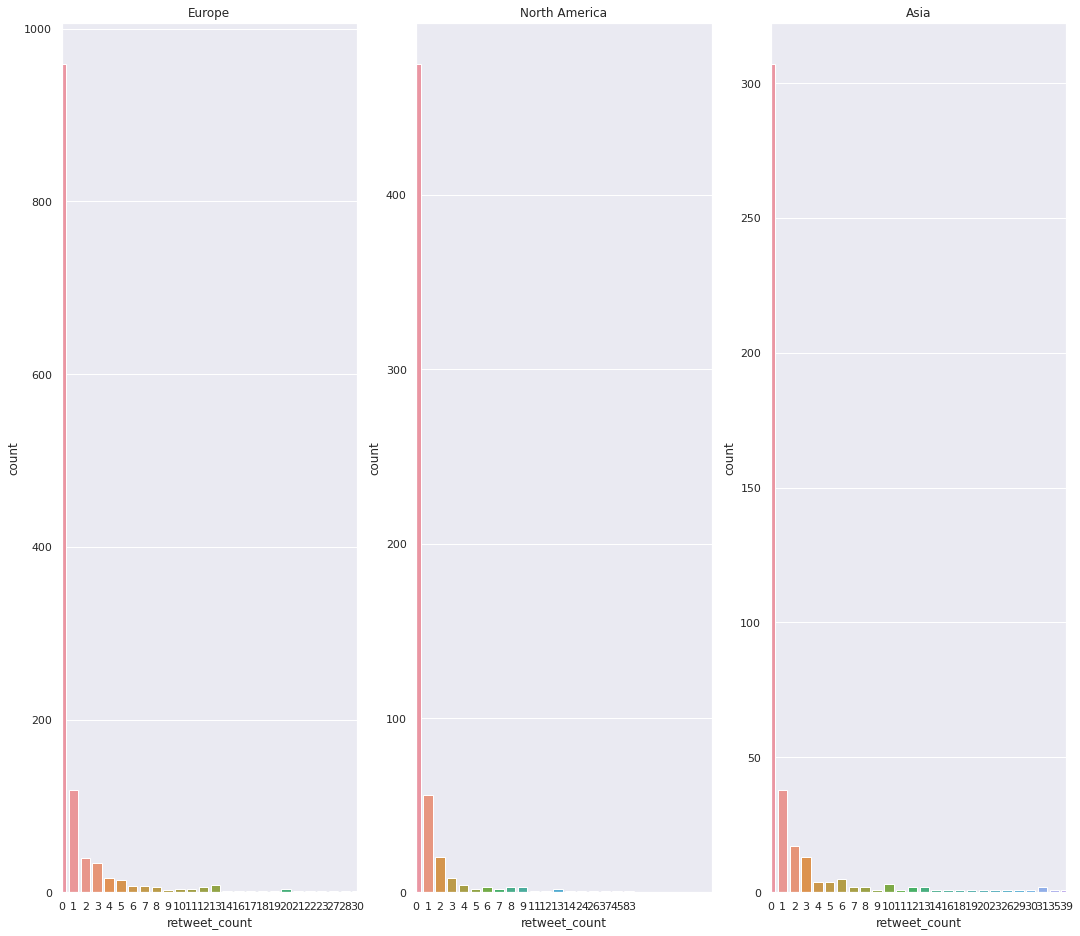

In [214]:
#retweet_count plots
fig, axs = plt.subplots(1,3, figsize=(18,16))

ax1=sns.countplot(x='retweet_count', data=EU_Cleaned, ax=axs[0])
ax1.set(title='Europe')
ax1.set_xlim([0, 25])

ax2=sns.countplot(x='retweet_count', data=NA_Cleaned, ax=axs[1])
ax2.set(title='North America')
ax2.set_xlim([0, 25])

ax3=sns.countplot(x='retweet_count', data=AS_Cleaned, ax=axs[2])
ax3.set(title='Asia')
ax3.set_xlim([0, 25])

plt.show()

*Favorite Count*

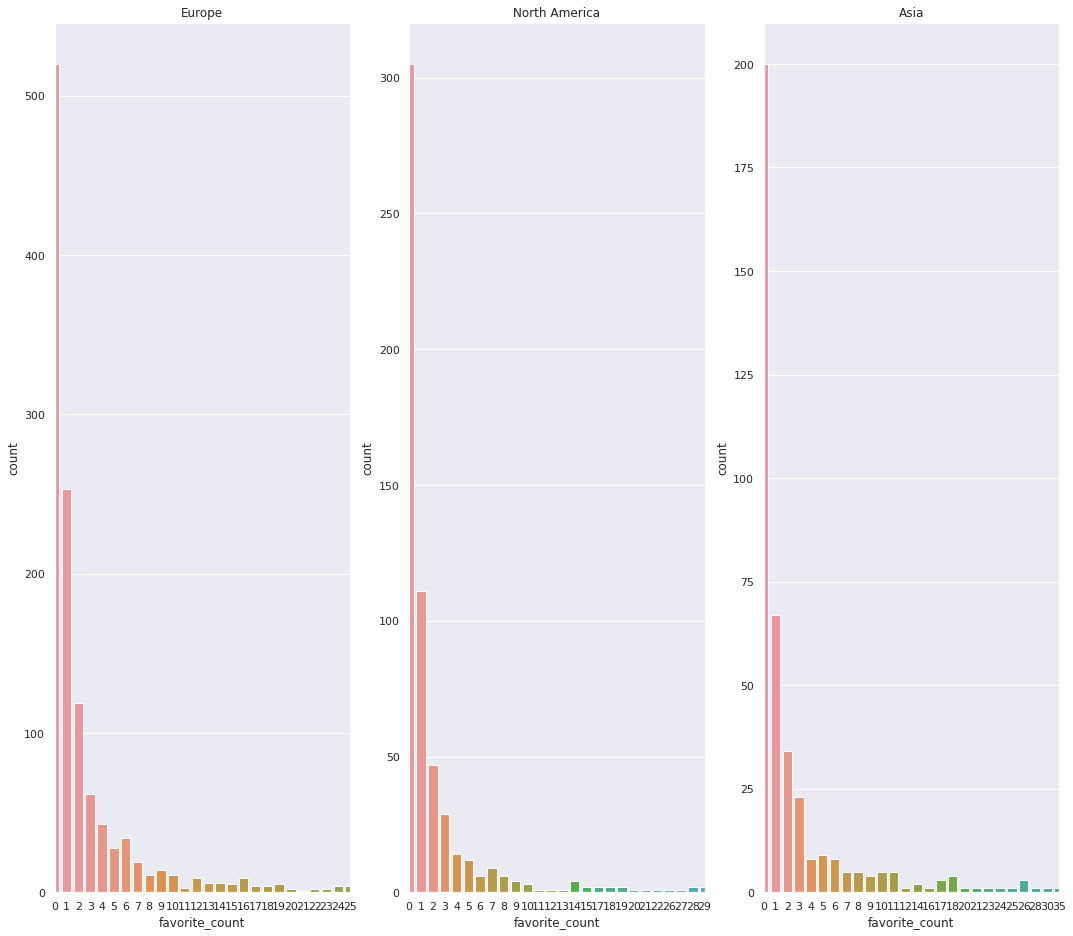

In [193]:
#favorite_count plots
fig, axs = plt.subplots(1,3, figsize=(18,16))

ax1=sns.countplot(x='favorite_count', data=EU_Cleaned, ax=axs[0])
ax1.set(title='Europe')
ax1.set_xlim([0, 25])

ax2=sns.countplot(x='favorite_count', data=NA_Cleaned, ax=axs[1])
ax2.set(title='North America')
ax2.set_xlim([0, 25])

ax3=sns.countplot(x='favorite_count', data=AS_Cleaned, ax=axs[2])
ax3.set(title='Asia')
ax3.set_xlim([0, 25])

plt.show()

**Wordclouds**

In [194]:
def my_tf_color_func(dictionary):
  def my_tf_color_func_inner(word, **kwargs):
    return "hsl(%d, 80%%, 50%%)" % (360 * dictionary[word])
  return my_tf_color_func_inner

*EU*

Normal words


(-0.5, 799.5, 499.5, -0.5)

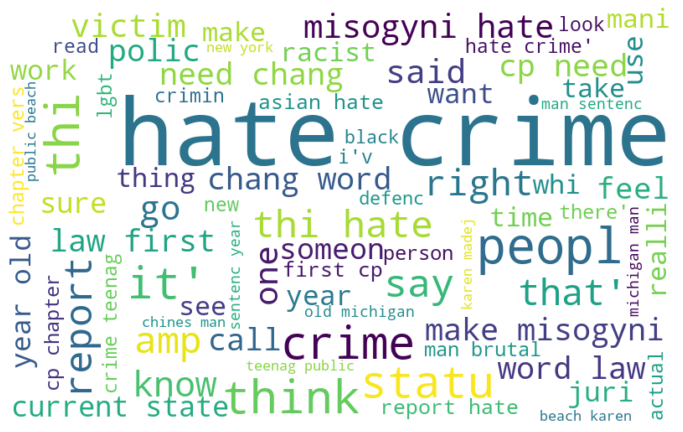

In [195]:
normal_words = ' '.join([word for word in EU_Cleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

*NA*

Normal words


(-0.5, 799.5, 499.5, -0.5)

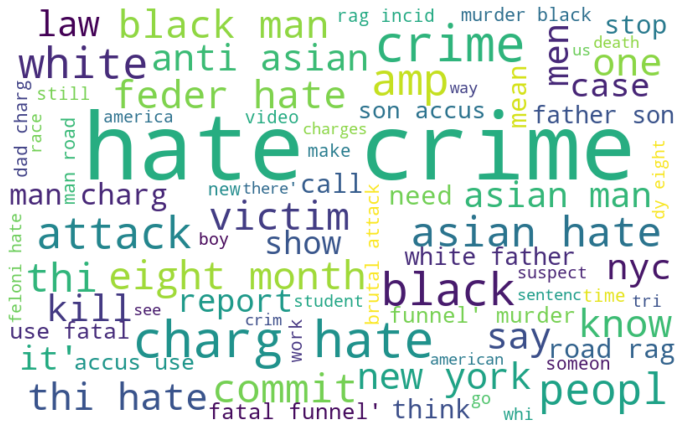

In [196]:
normal_words = ' '.join([word for word in NA_Cleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

*AS*

Normal words


(-0.5, 799.5, 499.5, -0.5)

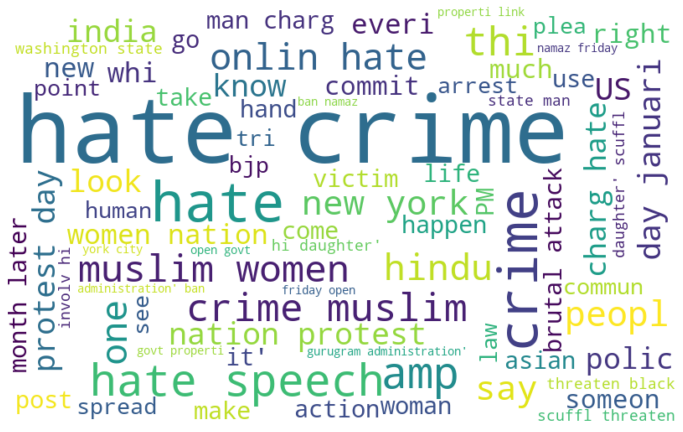

In [197]:
normal_words = ' '.join([word for word in AS_Cleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

**Vader Sentiment Analysis**
- polarity
- subjectivity
- neg, neu, pos scores
- compound
-sentiment

*Europe*

In [198]:
#Europe
sia = SentimentIntensityAnalyzer()
EU_Cleaned[['polarity', 'subjectivity']] = EU_Cleaned['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, s in enumerate(EU_Cleaned['text']):
  ps = sia.polarity_scores(s)
  EU_Cleaned.loc[index,['neg']] = ps['neg']
  EU_Cleaned.loc[index,['neu']] = ps['neu']
  EU_Cleaned.loc[index,['pos']] = ps['pos']
  EU_Cleaned.loc[index,['compound']] = ps['compound']
  if ps['neg'] > ps['pos']:
    EU_Cleaned.loc[index,['sentiment']] = 'negative'
  elif ps['pos'] > ps['neg']:
    EU_Cleaned.loc[index,['sentiment']] = 'positive'
  else:
    EU_Cleaned.loc[index,['sentiment']] = 'neutral'
   
EU_Cleaned.head(10)

,text,retweet_count,favorite_count,clean_tweet,Hash words,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,This is a hate crime. https://t.co/cLyuxZTDuZ,0,0,thi hate crime.,No hashtags,-0.800000,0.900000,0.706,0.294,0.000,-0.8020,negative
1,"@TheAcademy Cate Blanchett, or if she isn’t av...",0,0,"cate blanchett, available, next best kate - mc...",No hashtags,0.150000,0.400000,0.245,0.612,0.143,-0.4588,negative
2,I haven't been kissed on kiss a ginger day so ...,0,0,"I kiss kiss ginger day mani year row, hate crime",No hashtags,-0.800000,0.900000,0.388,0.496,0.116,-0.7639,negative
3,This is a hate crime https://t.co/lIQg9OS4ZZ,0,1,thi hate crime,No hashtags,-0.800000,0.900000,0.706,0.294,0.000,-0.8020,negative
4,This is a Hate Crime. Yuck https://t.co/fLHDoA...,0,0,thi hate crime. yuck,No hashtags,-0.800000,0.900000,0.643,0.357,0.000,-0.8020,negative
5,why are the celebrities ignoring me today this...,0,2,celebr ignor today hate crime,No hashtags,-0.800000,0.900000,0.553,0.447,0.000,-0.8720,negative
6,@bbceastenders I think story lines like this s...,0,0,I think stori line like air rais awar culprit ...,No hashtags,0.000000,0.000000,0.000,0.916,0.084,0.1901,positive
7,Black Femicide stats are continuing to rise on...,16,34,"black femicid stat continu rise daili basis, g...",No hashtags,-0.083333,0.216667,0.000,1.000,0.000,0.0000,neutral
8,@RogDangerfield @dhutchings91 lol that word ad...,0,0,lol word admiss barmi -make sound like crime p...,No hashtags,0.600000,0.550000,0.141,0.645,0.214,0.2023,positive
9,@metpoliceuk this is a hate crime https://t.co...,0,0,hate crime,No hashtags,-0.800000,0.900000,0.643,0.357,0.000,-0.8020,negative


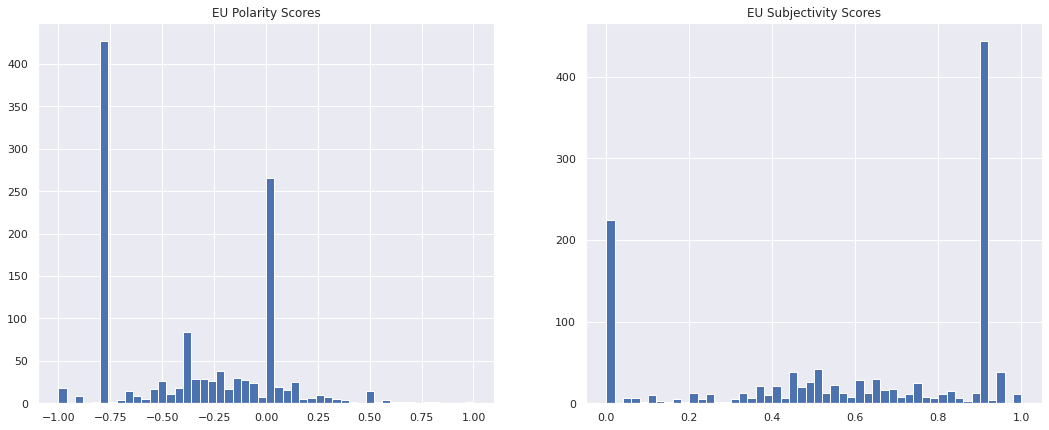

In [215]:
#EU Histograms of polarity and subjectivity
n_bins = 50
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,7))
ax1.hist(EU_Cleaned["polarity"], bins = n_bins)
ax1.set_title('EU Polarity Scores')
ax2.hist(EU_Cleaned["subjectivity"], bins = n_bins)
ax2.set_title('EU Subjectivity Scores')
plt.show()

[Text(0.5, 0, 'Europe Sentiment Result')]

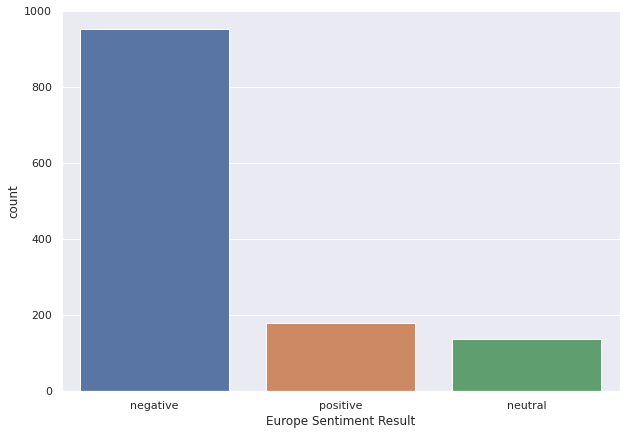

In [216]:
#EU Counterplot of sentiment
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="sentiment", data=EU_Cleaned)
ax.set(xlabel='Europe Sentiment Result')

*North Amercia*

In [201]:
#North America
sia = SentimentIntensityAnalyzer()
NA_Cleaned[['polarity', 'subjectivity']] = NA_Cleaned['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, s in enumerate(NA_Cleaned['text']):
  ps = sia.polarity_scores(s)
  NA_Cleaned.loc[index,['neg']] = ps['neg']
  NA_Cleaned.loc[index,['neu']] = ps['neu']
  NA_Cleaned.loc[index,['pos']] = ps['pos']
  NA_Cleaned.loc[index,['compound']] = ps['compound']
  if ps['neg'] > ps['pos']:
    NA_Cleaned.loc[index,['sentiment']] = 'negative'
  elif ps['pos'] > ps['neg']:
    NA_Cleaned.loc[index,['sentiment']] = 'positive'
  else:
    NA_Cleaned.loc[index,['sentiment']] = 'neutral'
   
NA_Cleaned.head()

,text,retweet_count,favorite_count,clean_tweet,Hash words,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,@sentinelvayne this is a hate crime,0,0,hate crime,No hashtags,-0.800000,0.900000,0.706,0.294,0.000,-0.8020,negative
1,@wedobeguaping no way she committed a hate cri...,0,1,way commit hate crime,No hashtags,-0.800000,0.900000,0.570,0.303,0.127,-0.8074,negative
2,Cross Ts And Dot Is....fucking hate this phras...,0,1,cross Ts and dot is....fuck hate phrase. everi...,No hashtags,-0.400000,0.500000,0.147,0.754,0.099,-0.2960,negative
3,Suspect in Waukesha Christmas Parade massacre ...,0,0,suspect waukesha christma parad massacr face 7...,No hashtags,0.268182,0.677273,0.511,0.489,0.000,-0.9118,negative
4,NYC man accused of attacking man for wearing I...,0,0,nyc man accus attack man wear israel defens fo...,No hashtags,-0.800000,0.900000,0.562,0.390,0.049,-0.9413,negative


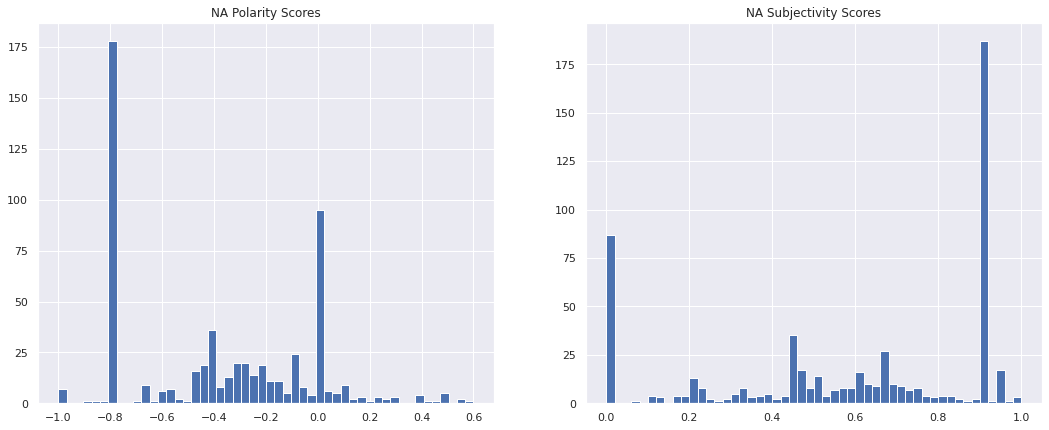

In [217]:
#NA Histograms of polarity and subjectivity
n_bins = 50
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,7))
ax1.hist(NA_Cleaned["polarity"], bins = n_bins)
ax1.set_title('NA Polarity Scores')
ax2.hist(NA_Cleaned["subjectivity"], bins = n_bins)
ax2.set_title('NA Subjectivity Scores')
plt.show()

[Text(0.5, 0, 'North America Sentiment Result')]

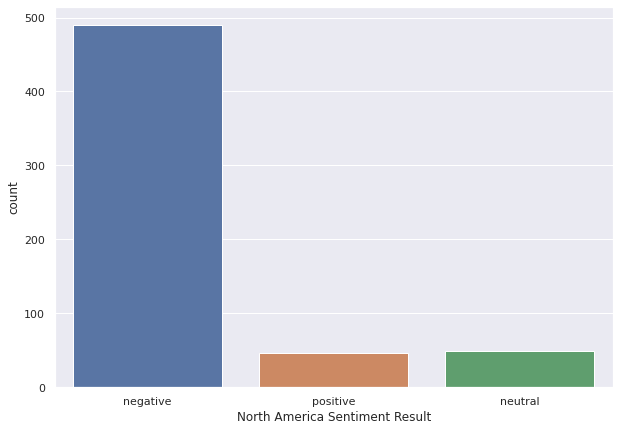

In [203]:
#NA Counterplot of sentiment
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="sentiment", data=NA_Cleaned)
ax.set(xlabel='North America Sentiment Result')

*Asia*

In [204]:
#Asia
sia = SentimentIntensityAnalyzer()
AS_Cleaned[['polarity', 'subjectivity']] = AS_Cleaned['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, s in enumerate(AS_Cleaned['text']):
  ps = sia.polarity_scores(s)
  AS_Cleaned.loc[index,['neg']] = ps['neg']
  AS_Cleaned.loc[index,['neu']] = ps['neu']
  AS_Cleaned.loc[index,['pos']] = ps['pos']
  AS_Cleaned.loc[index,['compound']] = ps['compound']
  if ps['neg'] > ps['pos']:
    AS_Cleaned.loc[index,['sentiment']] = 'negative'
  elif ps['pos'] > ps['neg']:
    AS_Cleaned.loc[index,['sentiment']] = 'positive'
  else:
    AS_Cleaned.loc[index,['sentiment']] = 'neutral'
   
AS_Cleaned.head()

,text,retweet_count,favorite_count,clean_tweet,Hash words,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,@therealnaomib Don't hate the criminal.Hate th...,0,0,don't hate criminal.h crime.,No hashtags,-0.800,0.900,0.304,0.435,0.261,-0.1285,negative
1,@vijaythottathil He should be charged under UA...,0,2,He charg uapa hate speech muslim genocid congr...,No hashtags,-0.800,0.900,0.244,0.756,0.000,-0.6705,negative
2,Criminal crime minister\nWe hate\n#ForeignFund...,0,0,crimin crime minist We hate #foreignfundedcrim...,#ForeignFundedCrimeMinister,-0.800,0.900,0.779,0.221,0.000,-0.8910,negative
3,We should hate both crime and criminals. The o...,5,5,"We hate crime criminals. the one made law, due...",No hashtags,-0.375,0.425,0.423,0.495,0.082,-0.9246,negative
4,@mr_mayank May be now he would be charged by t...,0,0,may would charg govern hate speech previou cri...,No hashtags,-0.800,0.900,0.224,0.776,0.000,-0.6705,negative


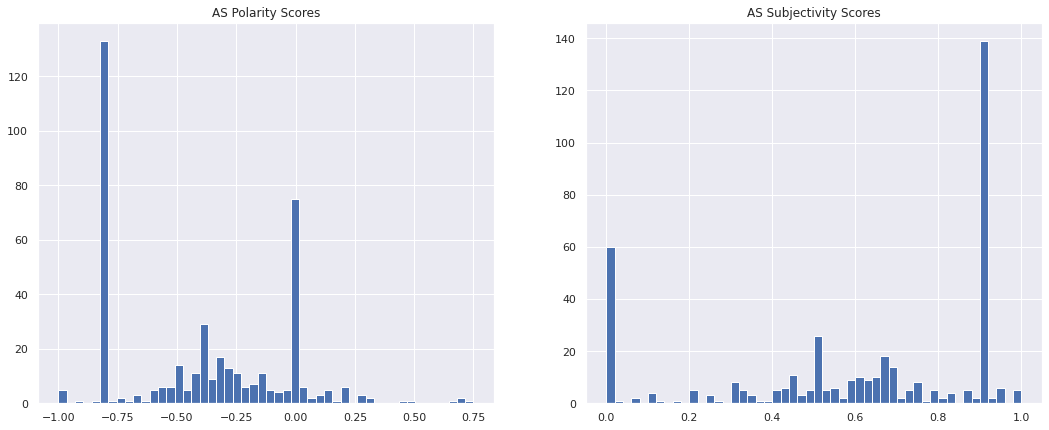

In [218]:
#AS Histograms of polarity and subjectivity
n_bins = 50
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,7))
ax1.hist(AS_Cleaned["polarity"], bins = n_bins)
ax1.set_title('AS Polarity Scores')
ax2.hist(AS_Cleaned["subjectivity"], bins = n_bins)
ax2.set_title('AS Subjectivity Scores')
plt.show()

[Text(0.5, 0, 'Asia Sentiment Result')]

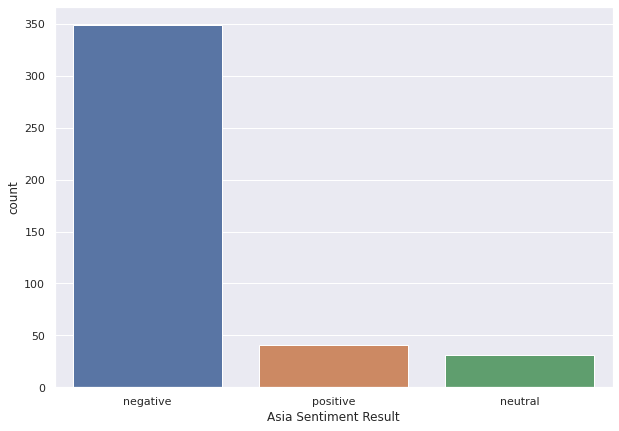

In [206]:
#AS Counterplot of sentiment
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="sentiment", data=AS_Cleaned)
ax.set(xlabel='Asia Sentiment Result')